# Script for extracting data from a CAMPUS plastics xlsx file

In [1]:
# First, we declare our libraries and directories
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import os
import pandas as pd
from os import listdir
from os.path import isfile, join
import time

start = time.time_ns()

source_directory = "points"
output_csv_directory = "output_csv"
output_img_directory = "output_jpg"


In [2]:
# We then gather all files, but for the sake of this example...
# ...We will only continue the experiment using the first file in the directory

files = [f for f in listdir(source_directory) if isfile(join(source_directory, f))]

filepath = "points/"+files[2]
df = pd.read_excel(filepath)

df.head()


,UDea™ EcoPaXX® Q20HG60 (dry),Unnamed: 1,Stress-strain (anisotropy)
0,°C,Strain in %,Stress in MPa
1,p - parallel,NaN,NaN
2,23,0,0
3,23,0.28,110
4,23,0.56,228.11


In [3]:
# Gather the name of the material, for documentation purposes later.
material = df.columns[0]
print(material)


UDea™ EcoPaXX® Q20HG60 (dry)


In [4]:
# Remove any row that contains anything that is not a number
df = df[df.apply(lambda x: pd.to_numeric(x, errors='coerce').notnull().all(), axis=1)]

In [5]:
df.head()

,UDea™ EcoPaXX® Q20HG60 (dry),Unnamed: 1,Stress-strain (anisotropy)
2,23,0,0
3,23,0.28,110
4,23,0.56,228.11
5,23,0.84,334.62
6,23,1.12,438.87


In [6]:
# obtain all values in the form of [Temperature_n, x_i, y_i] for all i values that are associated with Temperature_n 
arr = df.to_numpy(dtype='float64')
arr

array([[2.30000e+01, 0.00000e+00, 0.00000e+00],
       [2.30000e+01, 2.80000e-01, 1.10000e+02],
       [2.30000e+01, 5.60000e-01, 2.28110e+02],
       [2.30000e+01, 8.40000e-01, 3.34620e+02],
       [2.30000e+01, 1.12000e+00, 4.38870e+02],
       [2.30000e+01, 1.39000e+00, 5.42450e+02],
       [2.30000e+01, 1.67000e+00, 6.44800e+02],
       [2.30000e+01, 1.95000e+00, 7.45110e+02],
       [2.30000e+01, 2.23000e+00, 8.42910e+02],
       [2.30000e+01, 2.51000e+00, 9.37340e+02],
       [2.30000e+01, 2.79000e+00, 1.02195e+03]])

In [7]:
#Obtain the temperatures, Indices on where they start, and how many stress-strain values belong to this temperature

#if correct, the length of all 3 arrays should be the same
temps,index,counts = np.unique(df.values.T[0], return_index=True, return_inverse=False, return_counts=True)


In [8]:
temps

array([23], dtype=object)

In [9]:
index

array([0], dtype=int64)

In [10]:
counts

array([11], dtype=int64)

# Plot The Stress-Strain values for each temperature

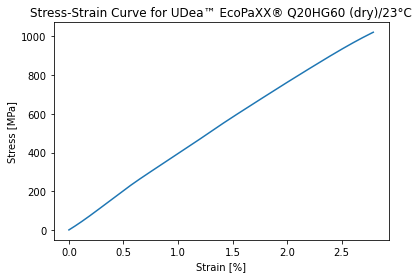

In [11]:
write_file = False

for i, temp in enumerate(temps):
    start = index[i]
    end = index[i]+counts[i]
    strain = arr.T[1][start:end]
    stress = arr.T[2][start:end]
    
    
    # Create a cubic spline interpolation function
    f = interp1d(strain, stress, kind='cubic')
    
    # Create a vector of x values to interpolate over
    x_interp = np.linspace(strain[0], strain[-1], 1000)
    
    # Use the spline interpolation function to interpolate the y values
    y_interp = f(x_interp)
    
    if write_file:        
        # Write x and y values to a CSV file
        csv_file = 'StressStrainPoints.csv'
        with open(csv_file, 'w') as file:
            file.write('Strain,Stress\n')
            for j in range(len(x_interp)):
                file.write(f'{x_interp[j]},{y_interp[j]}\n')
    
    
    # Plot the interpolated curve and original data points
    plt.plot(x_interp, y_interp)
    
    # Add axis labels, title, and legend
    plt.xlabel('Strain [%]')
    plt.ylabel('Stress [MPa]')
    
    #plt.title('Stress-Strain Curve for ~MATERIAL NAME/ Temperature~')
    title = f'Stress-Strain Curve for {material}/{temp}°C'
    plt.title(title)
    
    # Show the plot
    plt.show()
    


In [17]:
end = time.time_ns()

In [18]:
print(end - start)

1681706790608057500
